In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import segmentation, color
import skimage

In [4]:
def return_colors(image):
    unique_colors = np.unique(image.reshape(-1, 3), axis=0)
    return unique_colors

## Skimage division

In [8]:
img = skimage.io.imread("../images/buc.jpeg")

labels1 = segmentation.slic(img, compactness=30, n_segments=10000, start_label=0)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=1)


## Applying kmeans

In [9]:
vectorized = out1.reshape((-1, 3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 25  # (default = 17)
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape(img.shape)



In [12]:
img = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('lovebuc.png', img)

True

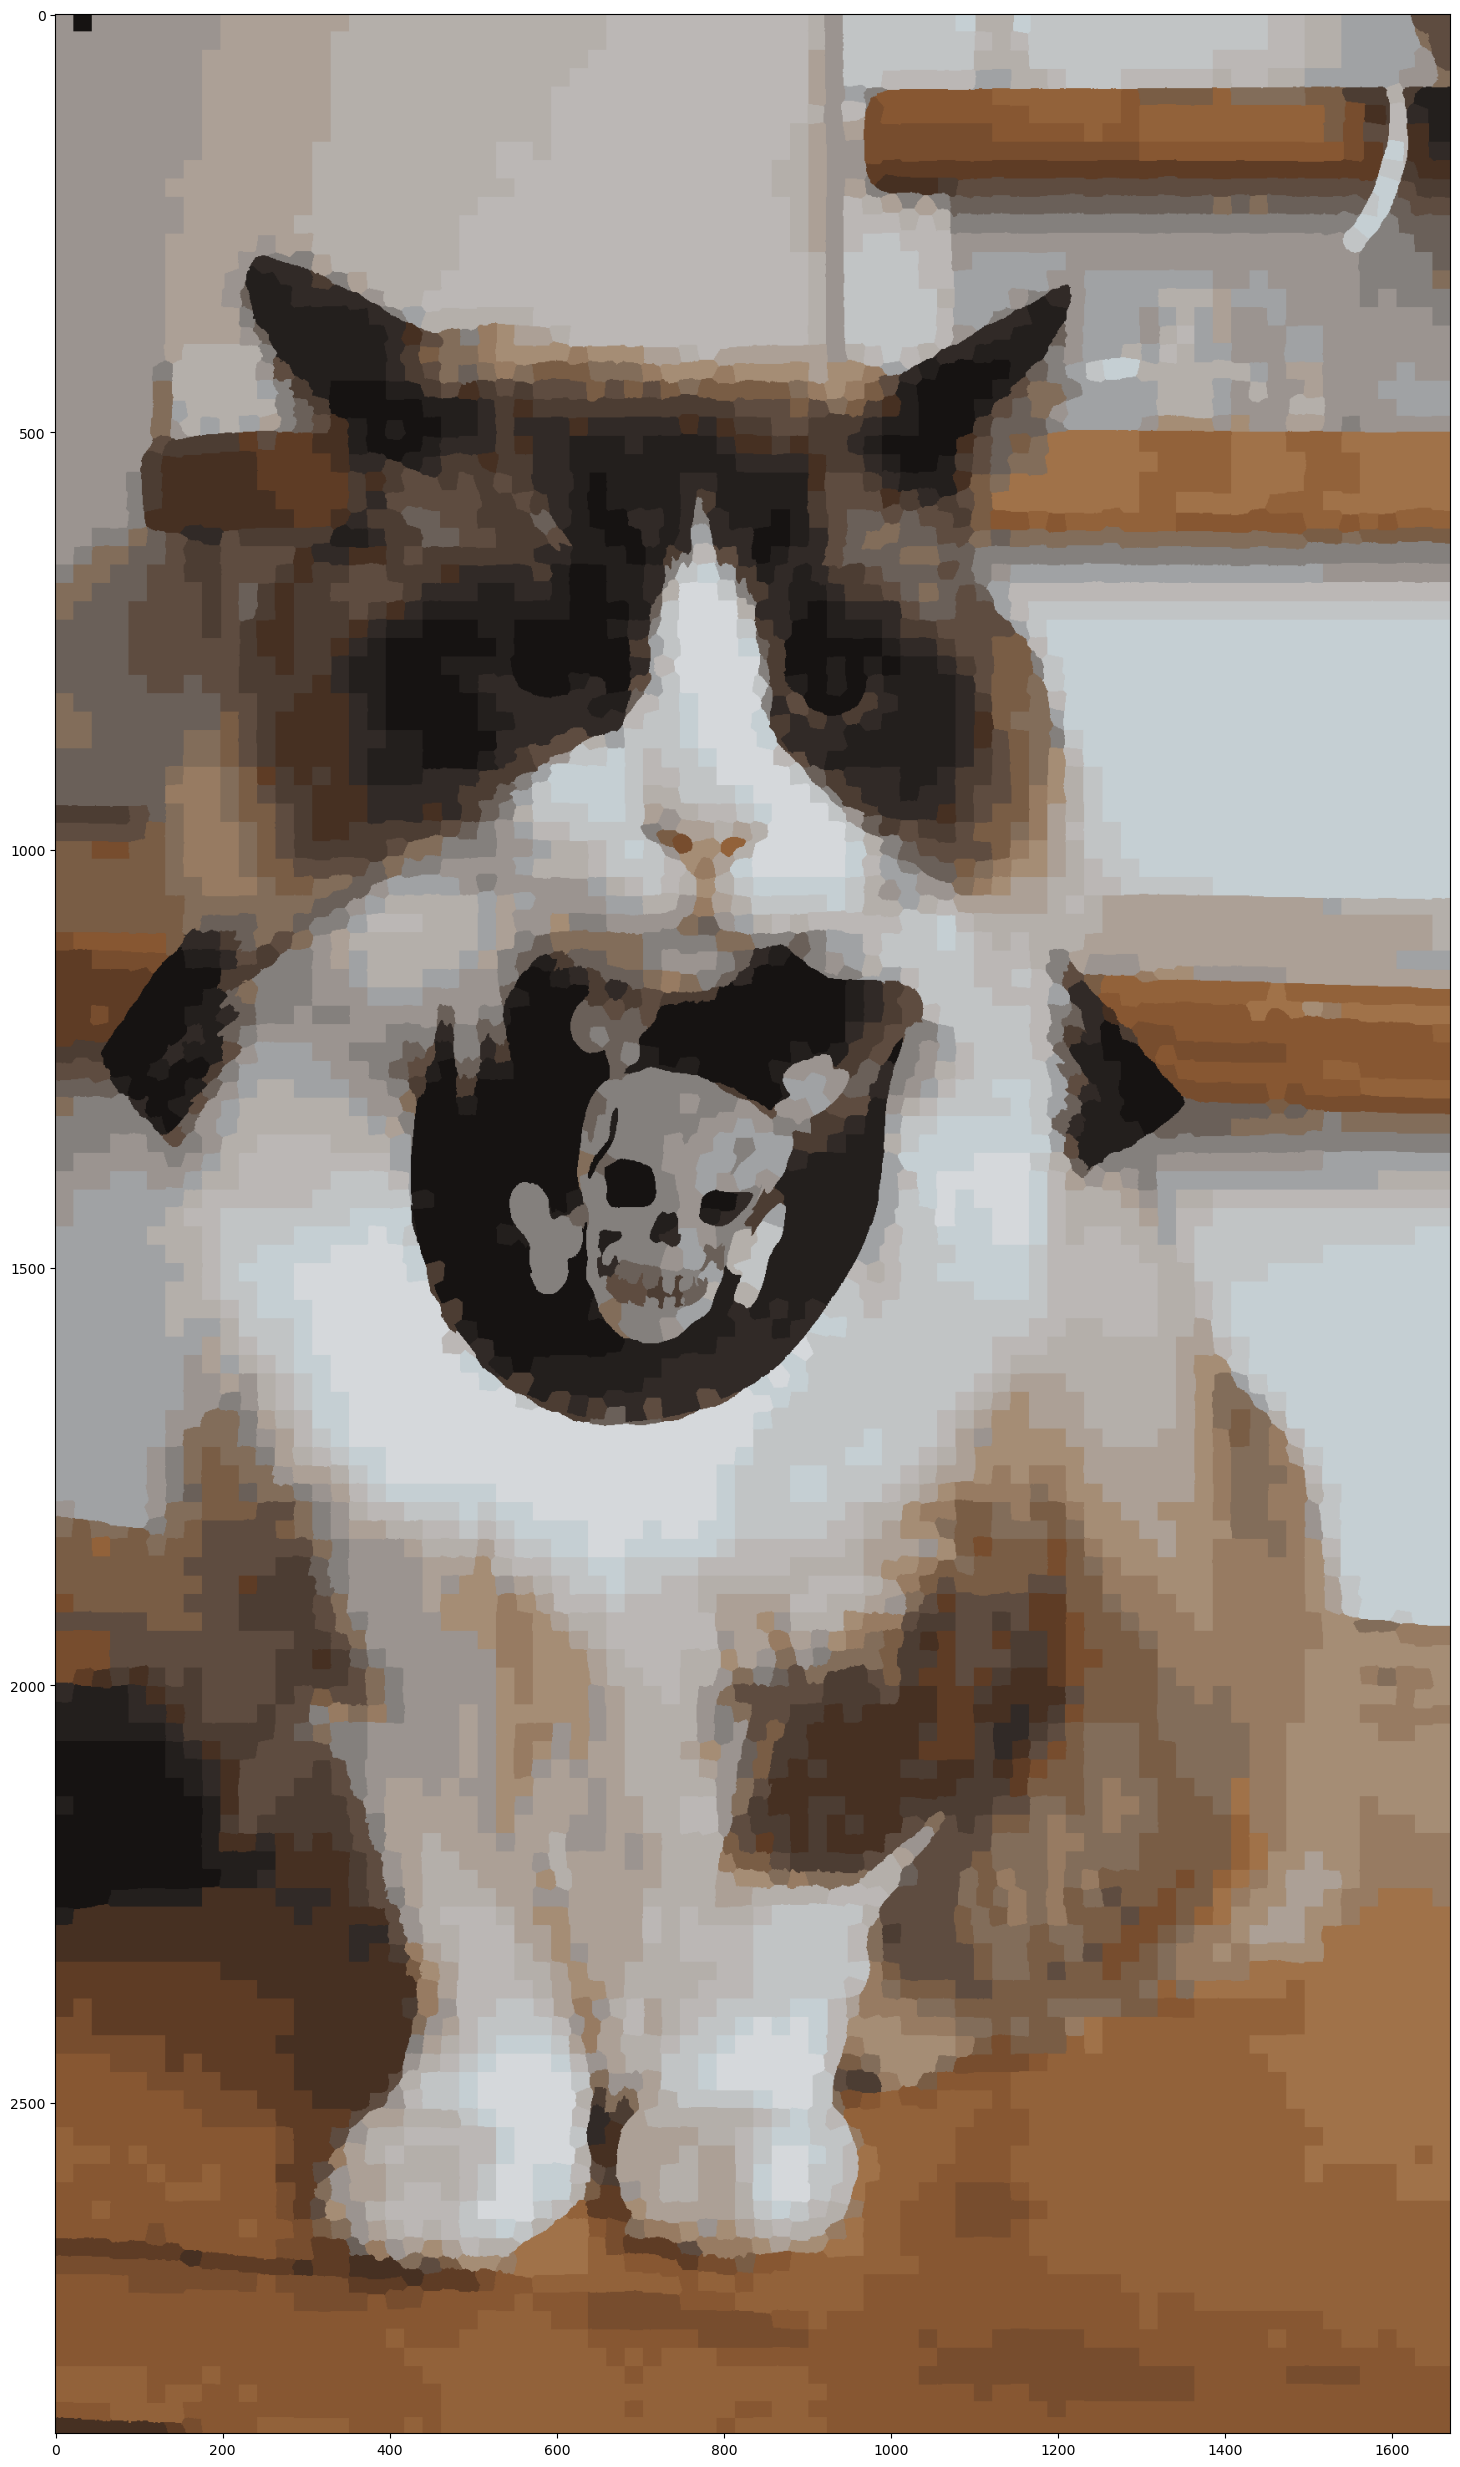

In [10]:
plt.figure(figsize=(18, 32))
plt.imshow(result_image)

## Borders

In [5]:
image_shape = result_image.shape
borders = np.zeros((image_shape[0], image_shape[1]))

# Vertical
for i in range(image_shape[0]):
    for j in range(image_shape[1] - 1):
        if not np.array_equal(result_image[i][j], result_image[i][j + 1]):
            borders[i][j] = 1

# Horizontal
for i in range(image_shape[0] - 1):
    for j in range(image_shape[1]):
        if not np.array_equal(result_image[i][j], result_image[i + 1][j]):
            borders[i][j] = 1

## Adding numbers

In [6]:
colors = return_colors(result_image)
len(colors)

25

In [7]:
mask = cv2.inRange(result_image, colors[1], colors[1]) # masks

In [8]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# v1

True

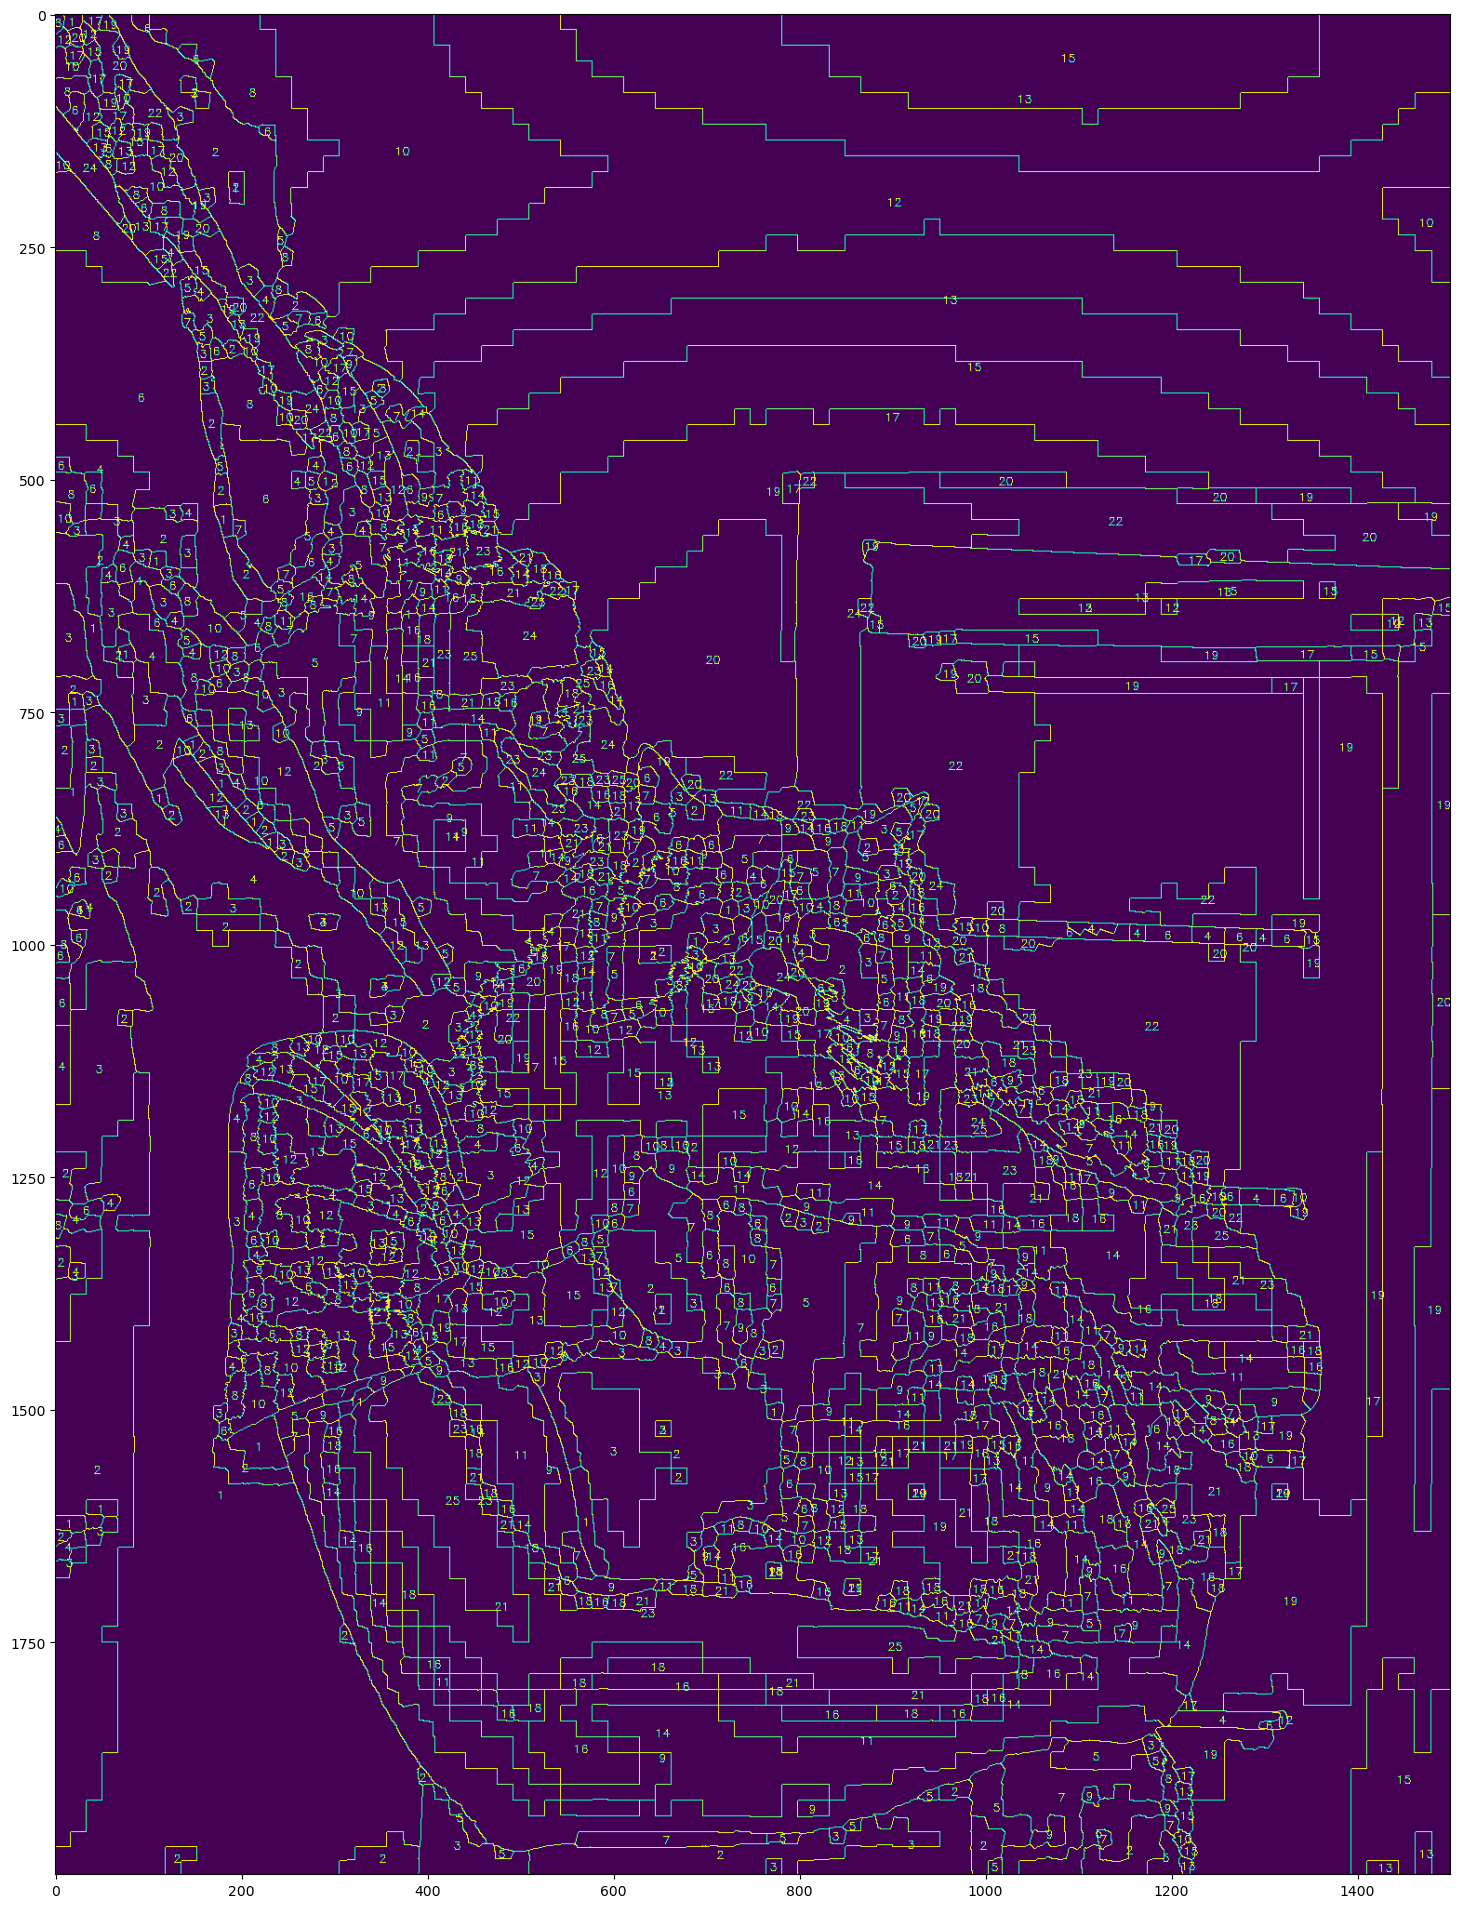

In [14]:
# Prepare the image for drawing (convert single channel mask to BGR)
borders_with_numbers = borders * 255

colors = return_colors(result_image)

for i, color in enumerate(colors):
    mask = cv2.inRange(result_image, color, color) # masks
    
    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)
    
    # Loop over all found contours
    for contour in contours:
        # Calculate moments for each contour
        M = cv2.moments(contour)
    
        if M["m00"] != 0:
            # Calculate x, y coordinate of center
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            # Set some default values in case of error
            cX, cY = 0, 0
    
        # Draw the contour and center of the shape on the image
        #cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)
        cv2.putText(borders_with_numbers, str(i + 1), (cX - 5, cY + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

plt.figure(figsize=(18, 32))
plt.imshow(borders_with_numbers)
cv2.imwrite('borders_numbers.png', 255 - borders_with_numbers)

# v2

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

borders_with_numbers = borders * 255
colors = return_colors(result_image)

for i, color in enumerate([colors[18]]):
    mask = cv2.inRange(result_image, color, color)
    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    print(contours[0])
    
    for contour in contours:
        hull = cv2.convexHull(contour)
        M = cv2.moments(hull)
        
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        cv2.putText(borders_with_numbers, str(i + 1), (cX - 5, cY + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

plt.figure(figsize=(18, 32))
plt.imshow(borders_with_numbers)
cv2.imwrite('borders_numbers.png', 255 - borders_with_numbers)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:194: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


# v3

True

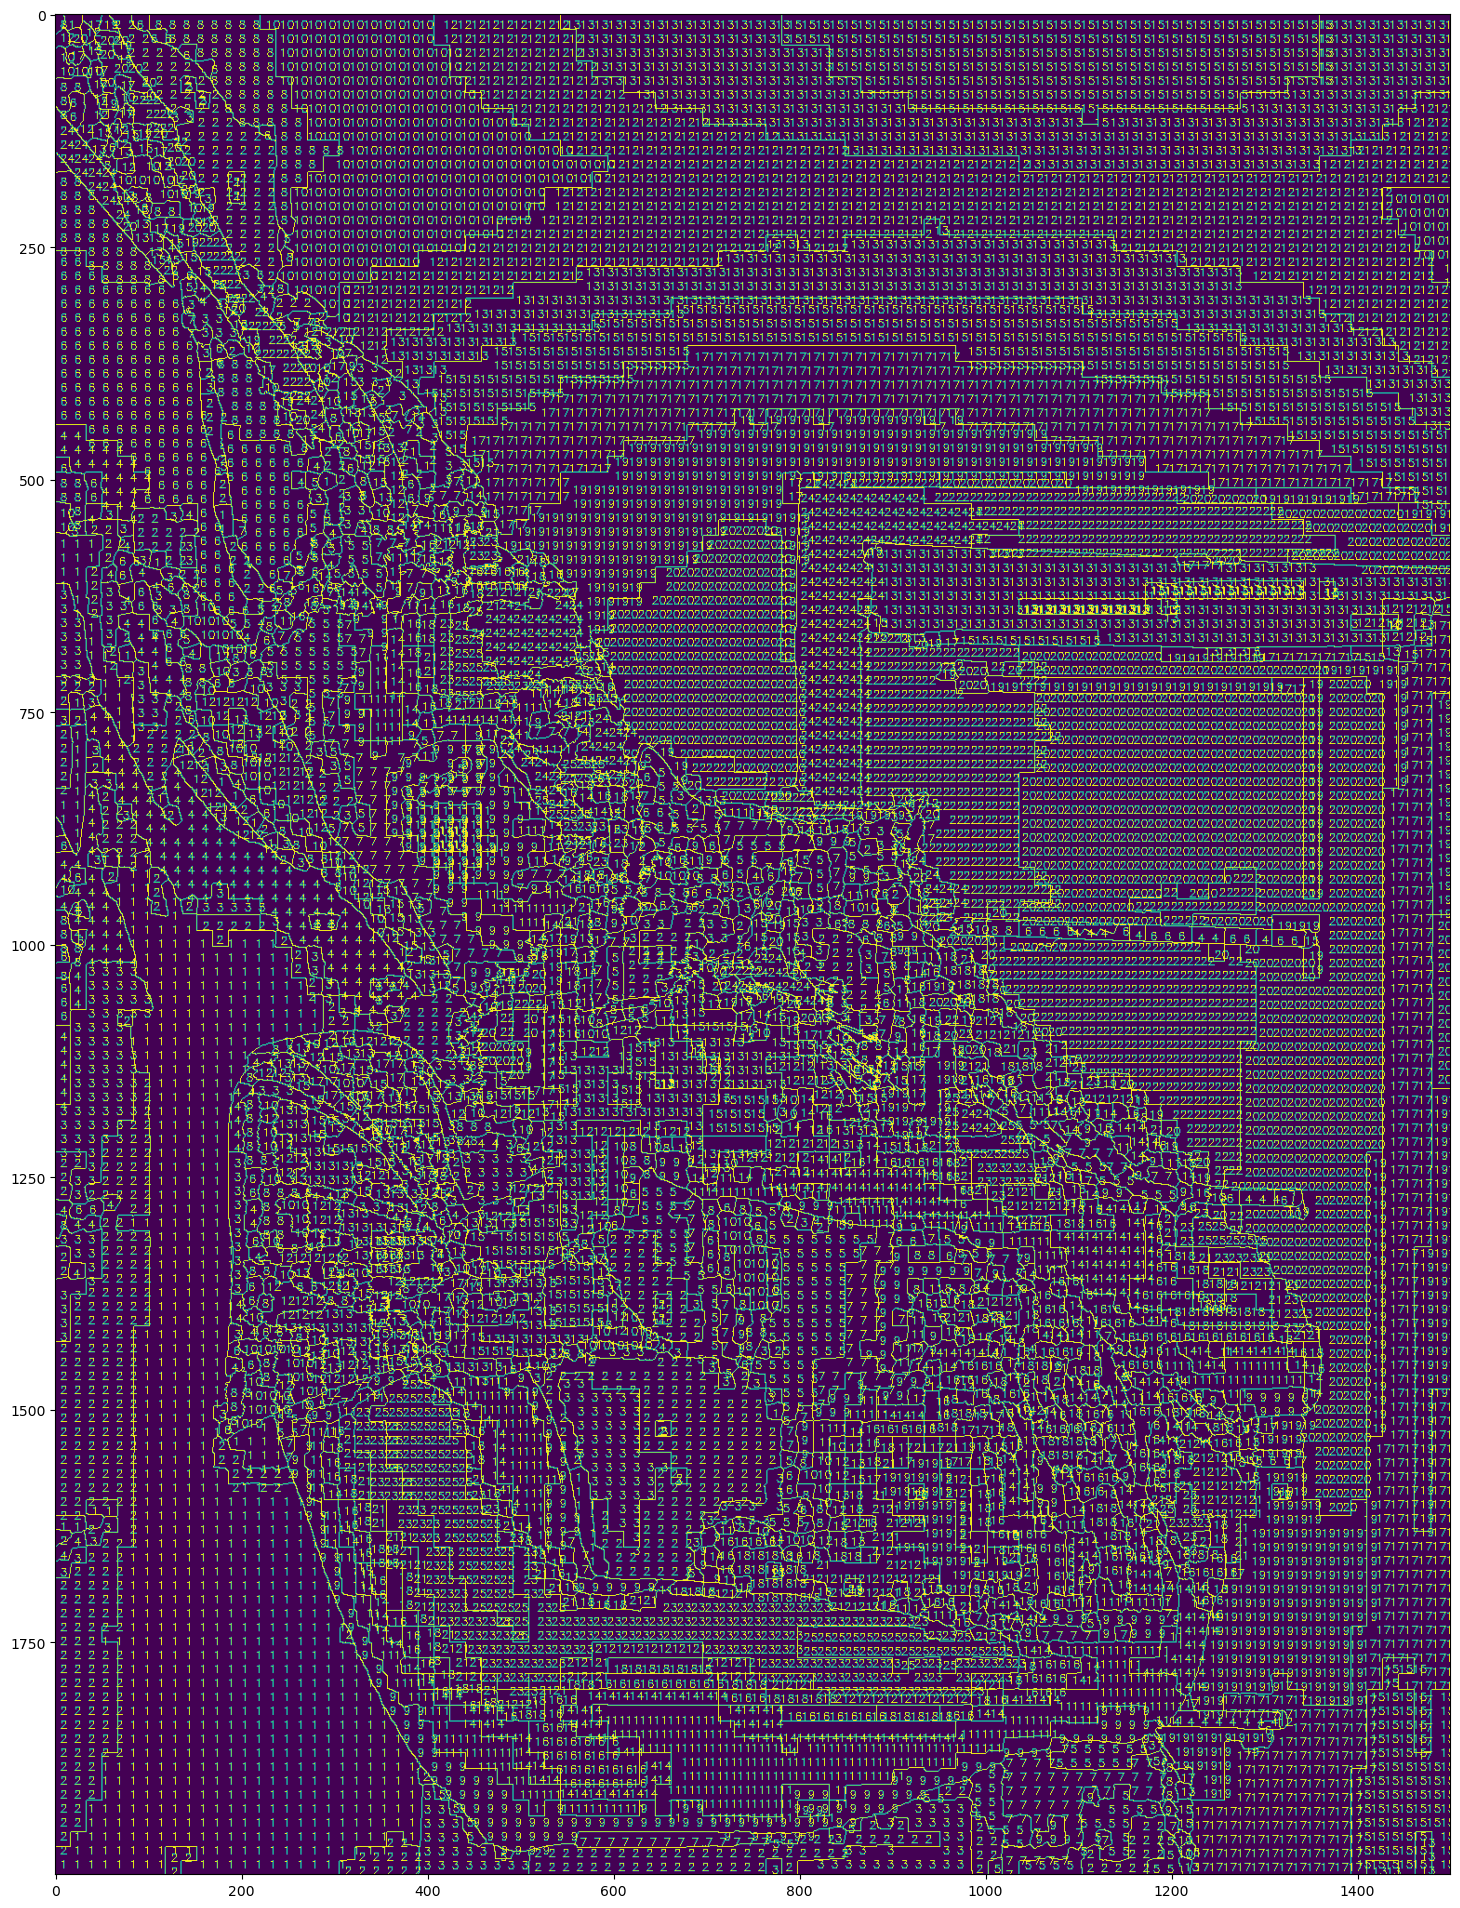

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

borders_with_numbers = borders * 255
colors = return_colors(result_image)

for i, color in enumerate(colors):
    mask = cv2.inRange(result_image, color, color)
    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        grid_size = 20  # Define the size of each grid cell
        for gx in range(x, x + w, grid_size):
            for gy in range(y, y + h, grid_size):
                grid_rect = np.array([[gx, gy], [gx + grid_size, gy], [gx + grid_size, gy + grid_size], [gx, gy + grid_size]])
                if cv2.pointPolygonTest(contour, (gx + grid_size // 2, gy + grid_size // 2), False) >= 0:
                    cv2.putText(borders_with_numbers, str(i + 1), (gx + 5, gy + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

plt.figure(figsize=(18, 32))
plt.imshow(borders_with_numbers)
cv2.imwrite('borders_numbers.png', 255 - borders_with_numbers)


# v4

True

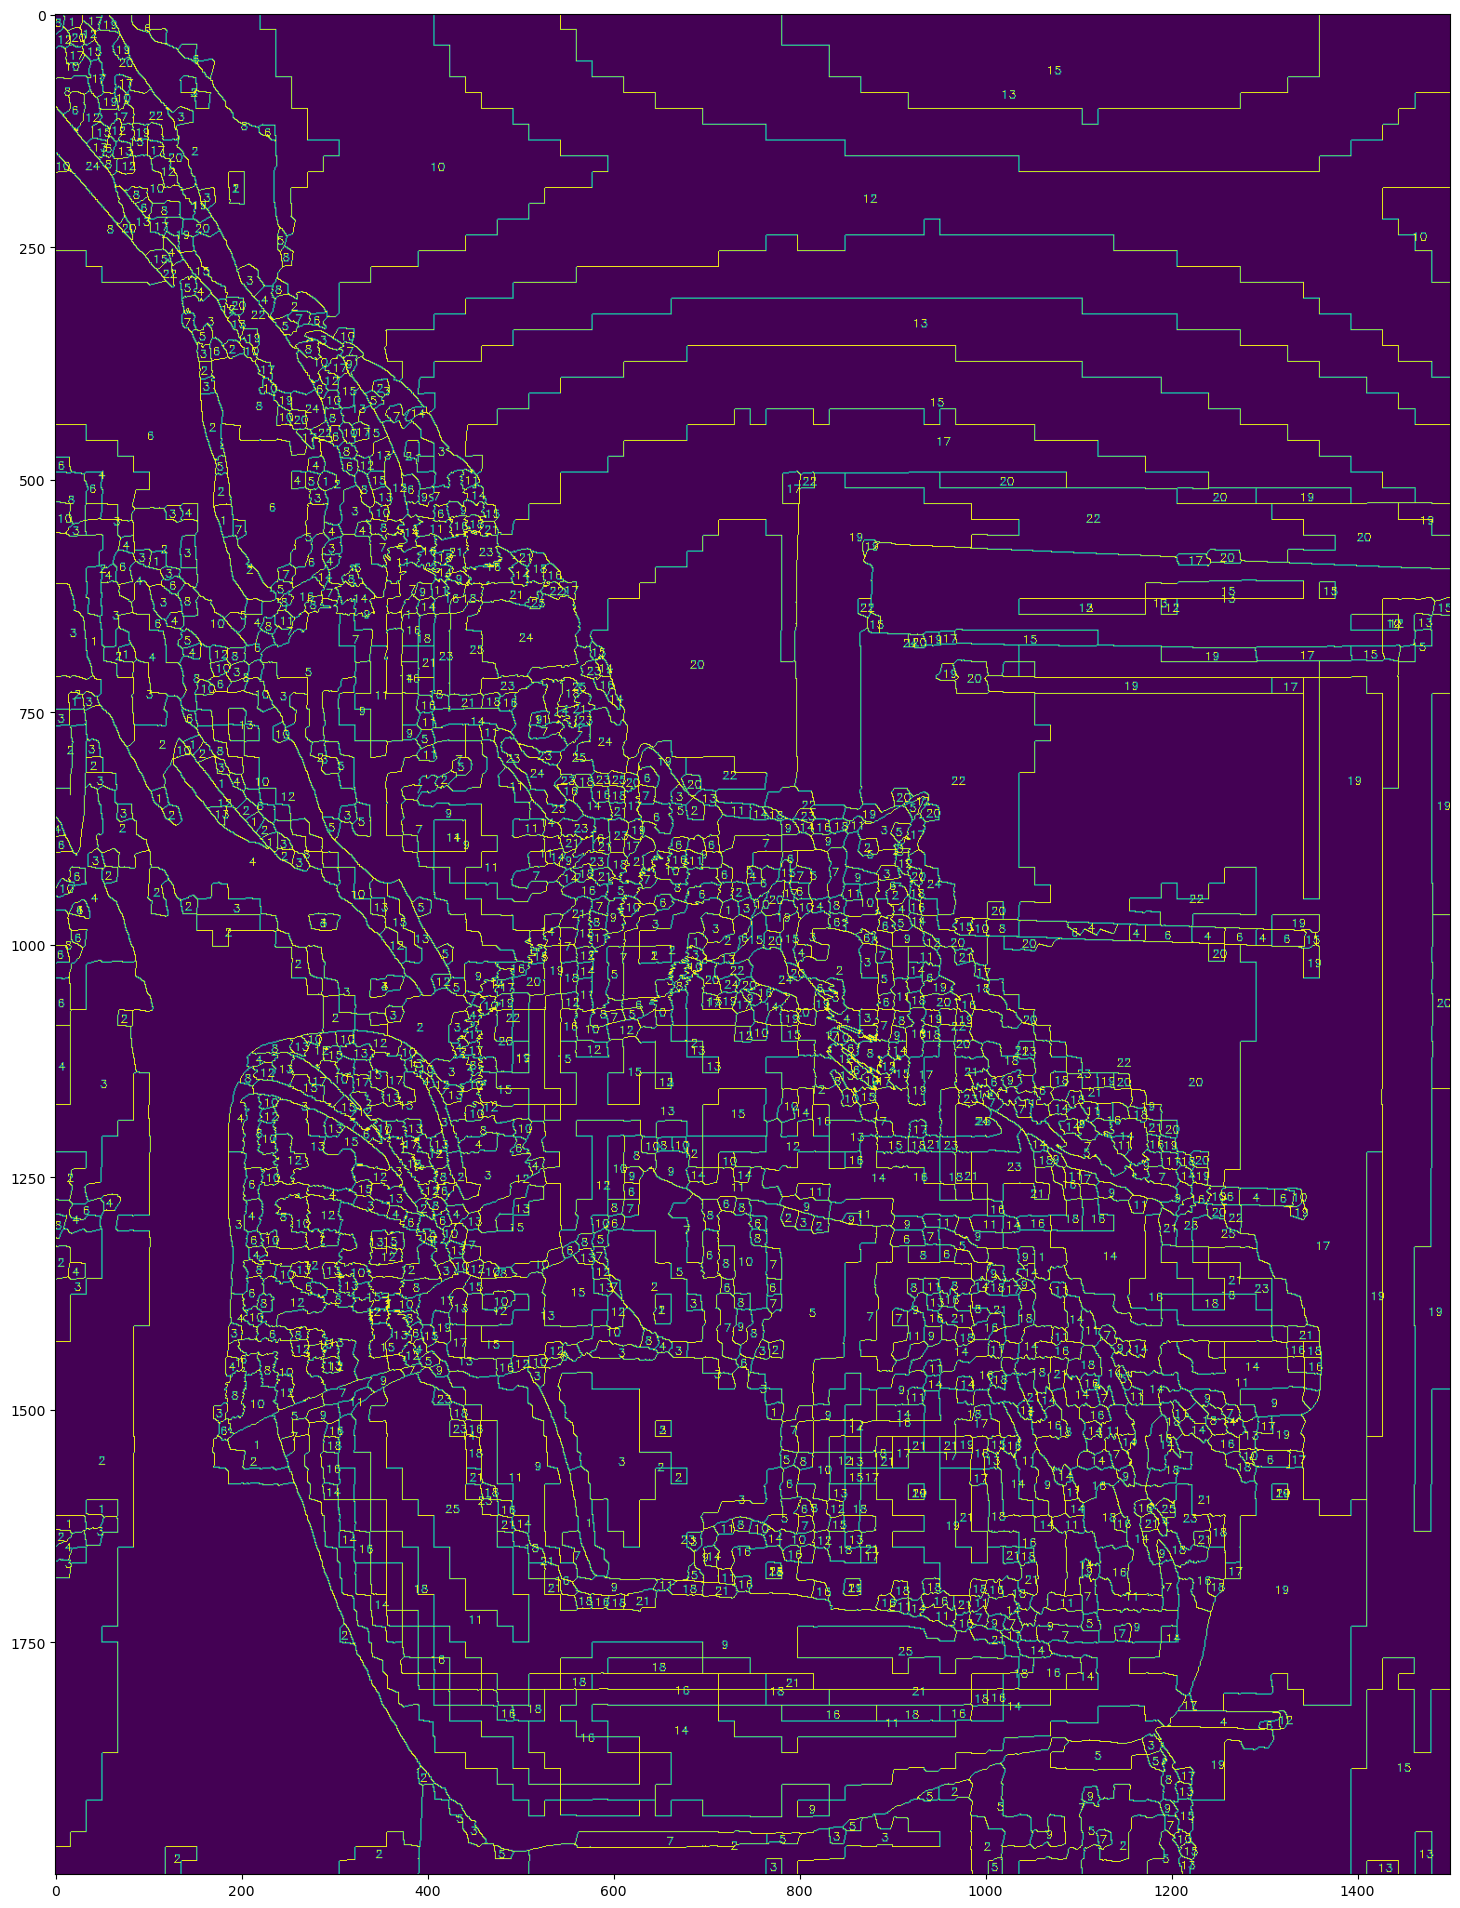

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

borders_with_numbers = borders * 255
colors = return_colors(result_image)

for i, color in enumerate(colors):
    mask = cv2.inRange(result_image, color, color)
    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        M = cv2.moments(contour)
        
        if M["m00"] != 0:
            centroidX = int(M["m10"] / M["m00"])
            centroidY = int(M["m01"] / M["m00"])
        else:
            centroidX, centroidY = x + w // 2, y + h // 2

        # Use centroid for smaller areas, bounding box center for larger areas
        if area < 1000:
            cX, cY = centroidX, centroidY
        else:
            cX, cY = x + w // 2, y + h // 2
        
        cv2.putText(borders_with_numbers, str(i + 1), (cX - 5, cY + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

plt.figure(figsize=(18, 32))
plt.imshow(borders_with_numbers)
cv2.imwrite('borders_numbers.png', 255 - borders_with_numbers)